In [ ]:
import coremltools as ct
from pathlib import Path
from fastai.data.transforms import get_image_files
import numpy as np
from PIL import ImageDraw, Image
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer; debug_here = Tracer()
from itertools import chain
from random import randint

/Users/id/nassync/2050-chess-vision/training-data-app/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  import sys


In [ ]:
m_u = Path("/Users/id/nassync/2050-chess-vision/chess-detection/ChessBoardDetector.mlproj/Models/ChessBoardDetector 1.mlmodel")
im_u = Path("/Users/id/.fastai/data/chess_screenshots/test")
m_u.exists()

True

In [ ]:
model = ct.models.MLModel(m_u.as_posix())

In [ ]:
spec = model.get_spec()
input = spec.description.input
input_shape = (input[0].type.imageType.width, input[0].type.imageType.height)

In [ ]:
im_us = get_image_files(im_u)

In [ ]:
def load_image(path, resize_to=None):
    img = Image.open(path)
    if resize_to is not None:
        img = img.resize(resize_to, Image.ANTIALIAS)
    img_np = np.array(img).astype(np.float32)
    return img_np, img

In [ ]:
def draw_rect(img, prediction):
    coord = convert_coord(prediction['coordinates'], img.size[0])
    draw = ImageDraw.Draw(img)
    draw.rectangle(coord, outline='blue', width=5)

In [ ]:
def convert_coord(coord, img_size):
    """ convert coordinates from prediction space to image space """
    x, y, w, h = list(np.ravel(coord) * img_size)
    x = x - w/2
    y = y - h/2
    return (x, y, x + w, y + h)

4

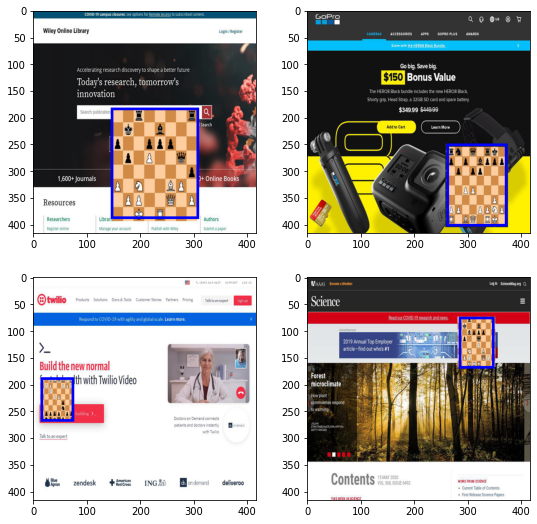

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
axs = list(chain(*axs))
for ax in axs:
    idx = randint(0, len(im_us))
    img_np, img = load_image(im_us[idx], input_shape)
    out_dict = model.predict({"imagePath": img})
    draw_rect(img, out_dict)
    ax.imshow(img)
fig
len(axs)

In [ ]:
p = Path("/Users/id/screenshots/CleanShot 2021-04-08 at 10.43.27@2x.png")

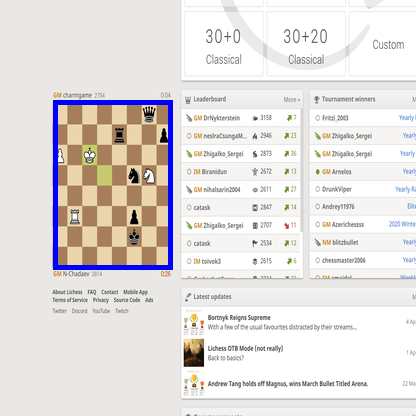

In [ ]:
img_np, img = load_image(p, input_shape)
out_dict = model.predict({"imagePath": img})
draw_rect(img, out_dict)
img

In [ ]:
out_dict

{'coordinates': array([[0.27148438, 0.4453125 , 0.28662109, 0.40625   ]]),
 'confidence': array([[0.984375]])}